<a href="https://colab.research.google.com/github/hashir5/Image-Classification-cats-vs-dogs/blob/main/cats_vs_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:40<00:00, 30.4MB/s]
100% 1.06G/1.06G [00:40<00:00, 28.5MB/s]


In [3]:
# Unzip the Dataset
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [14]:
# Inport all the required Libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,BatchNormalization,Dropout


In [6]:
# Creating the Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 50,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 50,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize the Data
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [19]:
# Crete the Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [20]:
# Check the Model Summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [21]:
# Compile the Model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


In [100]:
# Run the Model
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)


Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 50s 124ms/step - accuracy: 0.9725 - loss: 0.0721 - val_accuracy: 0.8182 - val_loss: 0.5485
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 81s 122ms/step - accuracy: 0.9766 - loss: 0.0583 - val_accuracy: 0.8380 - val_loss: 0.9451
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 85s 129ms/step - accuracy: 0.9769 - loss: 0.0566 - val_accuracy: 0.8336 - val_loss: 0.7234
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.9775 - loss: 0.0446 - val_accuracy: 0.8152 - val_loss: 0.9044
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 52s 130ms/step - accuracy: 0.9794 - loss: 0.0449 - val_accuracy: 0.8238 - val_loss: 0.5116
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 52s 129ms/step - accuracy: 0.9807 - loss: 0.0408 - val_accuracy: 0.8364 - val_loss: 0.6058
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 52s 130ms/step - accuracy: 0.9820 - loss: 0.0412 - val_accuracy: 0.7322 - val_loss: 0.7631
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 48s 119ms/step - accuracy: 0.9781 - loss: 0

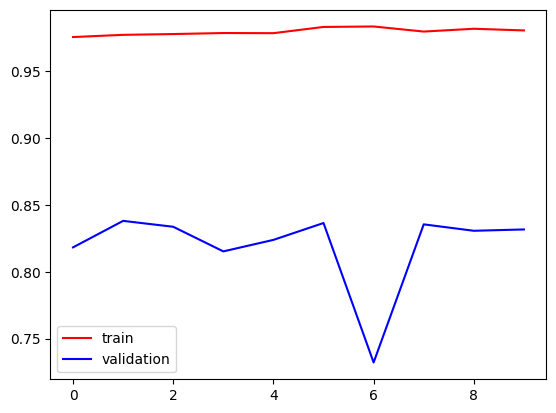

In [101]:
# Draw the Grap of Model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


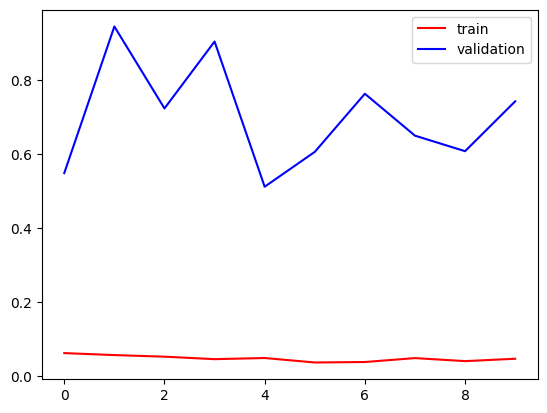

In [102]:
# Plot the training loss and validation loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [103]:
# Predicting the result
import cv2

In [104]:
# Read the image to check result
test_img = cv2.imread('/content/cat.jpeg')


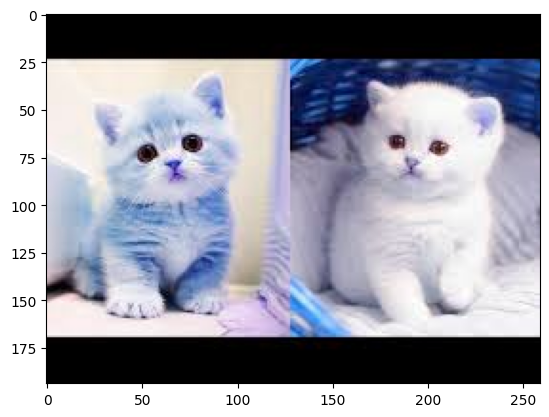

In [105]:
# plot the image
plt.imshow(test_img)

In [106]:
test_img.shape

(194, 259, 3)

In [107]:
# shape the image
test_img = cv2.resize(test_img,(256,256))


In [108]:
# create the image and convert into 4D
test_input = test_img.reshape(1,256,256,3)

In [109]:
# output should be zero it indicatetes the cat
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


array([[1.]], dtype=float32)